In [2]:
library(tidyverse)
theme_set(theme_classic())
options(repr.plot.width  = 8, repr.plot.height = 5)
set.seed(1)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# STATS 604
## Week 12: Survival Analysis

Survival analysis is a branch of statistics that studies the occurrence and timing of random events.
- How long until the patient relapses?
- How long until the hard drive fails?
- How long until the next earthquake in CA?

In [21]:
## Example dataset
library(survival)
help(lung)

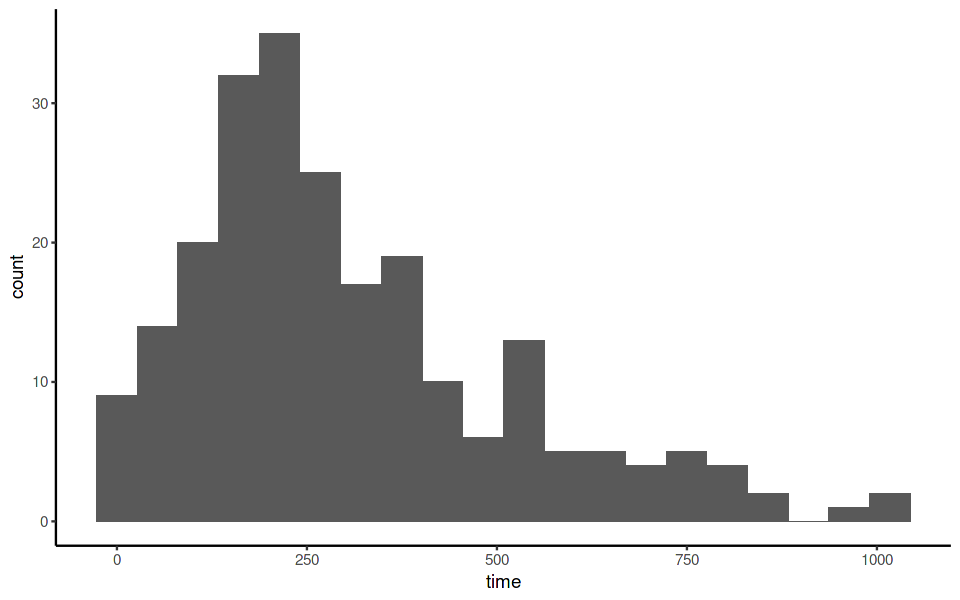

In [27]:
lung %>% as_tibble %>% ggplot(aes(x = time)) + geom_histogram(bins=20)

Does this reflect the actual distribution of survival time given that you have lung cancer? Not exactly, because some people were still alive when the study terminated. In fact, the person with the longest lifespan in the whole dataset is one of them:

In [35]:
lung[which.max(lung$time), ]

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,12,1022,1,74,1,1,50,80,513,0


### Survival curve

A basic question we can ask is:

> Given that I have lung cancer, what is the probability that I survive at least $t$ days?

The quantity that answers this is the **survival function**

$$S(t) = \mathbb{P}(T > t) = 1 - F(t)$$

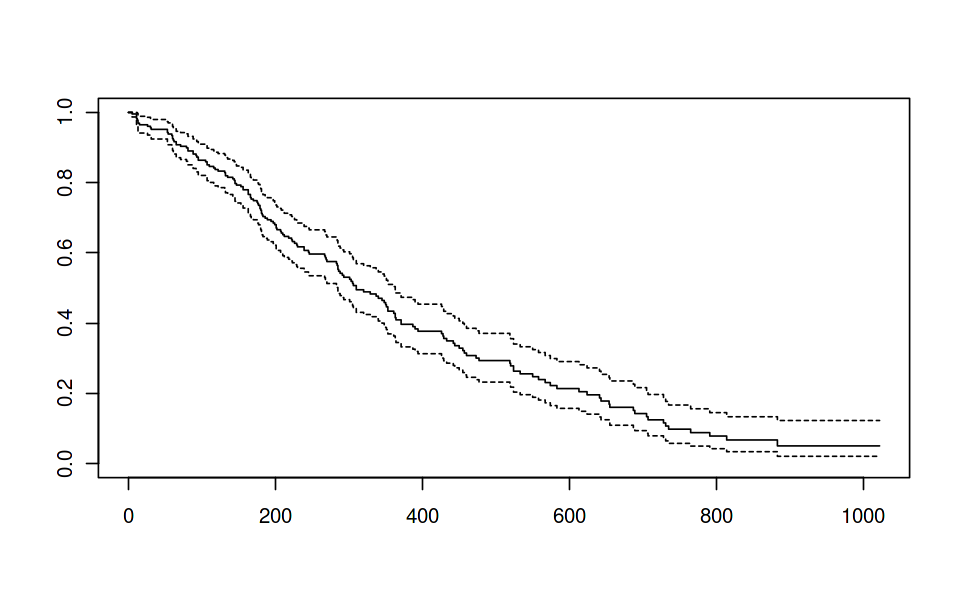

In [46]:
library(survival)
lung <- lung %>% 
  mutate(
    status = recode(status, `1` = 0, `2` = 1)
  ) # 0 = censored, 1 = dead 
lung %>% survfit(Surv(time, status) ~ 1, data = .) %>% 
  plot

### Hazard rate
Another question we can ask is: what is my "instantaneous" risk of dying right now, given that I've survived to time $t$? The quantity that answers this is the **hazard rate function**

$$h(t)=\lim_{\Delta t\to 0} \frac{\mathbb{P}(t \le T < t + \Delta t\mid T>t)}{\Delta t}$$

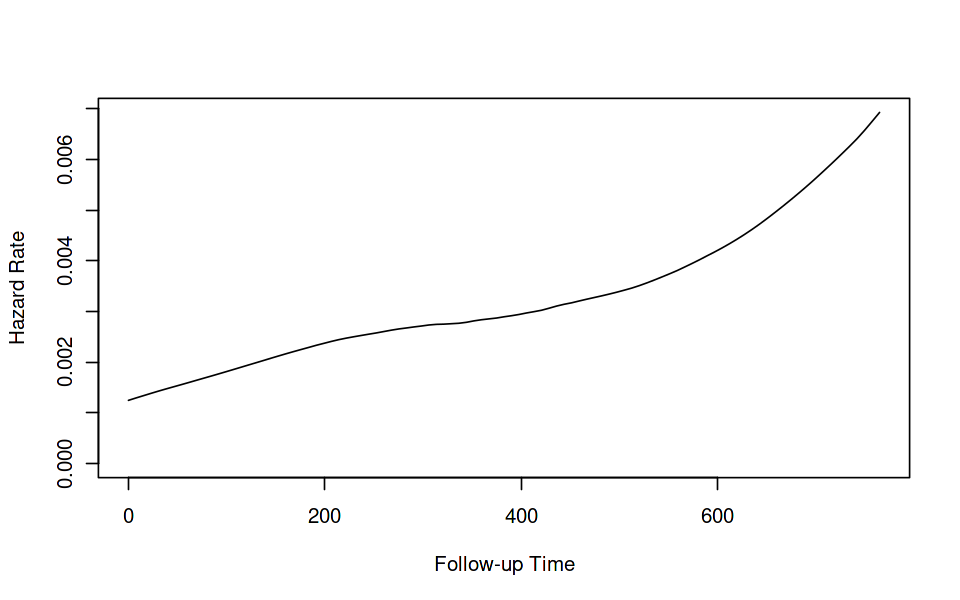

In [50]:
library(muhaz)
mod.lung <- muhaz(lung$time, lung$status) # 1 = failure, 0 = censored
plot(mod.lung)

### BHHT data

- The full BHHT dataset is uploaded to the course website.
- (A reduced version containing 10,000 randomly sampled rows is posted to the Github.)

In [52]:
bhht <- read_csv("bhht_small.csv.gz")

Rows: 10000 Columns: 49
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (25): wikidata_code, approx_birth, approx_death, gender, level1_main_occ...
dbl (24): birth, death, updated_death_date, birth_min, birth_max, death_min,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [53]:
head(bhht)

wikidata_code,birth,death,updated_death_date,approx_birth,approx_death,birth_min,birth_max,death_min,death_max,⋯,area2_of_rattachment,list_wikipedia_editions,un_region,group_wikipedia_editions,bplo1,dplo1,bpla1,dpla1,pantheon_1,level3_all_occ
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Q466886,1549,1614,NA,NA,NA,1549,1549,1614,1614,⋯,Missing,dewiki|plwiki|frwiki|svwiki|nlwiki|enwiki,Europe,grA,15.535887,14.55167,51.56427,52.34195,0,D:_theologian_writer_academic_P:_theologian_poet_theologian_English_ poète_théologien_French_theologe_dichter_German_rektor_teolog_professor_Swedish
Q16066925,1878,1924,NA,NA,NA,1878,1878,1924,1924,⋯,Missing,enwiki,Oceania,grA,144.455002,144.99899,-37.24700,-37.78900,0,D:_football_P:_pharmacist_football_club_English
Q2072123,1927,2019,NA,NA,NA,1927,1927,2019,2019,⋯,Missing,jawiki|ruwiki|frwiki|enwiki|dewiki|itwiki,America,grA,-87.493103,-74.00000,41.61110,40.70000,0,D:_violin_P:_violin_English_violoniste_French_violinista_insegnante_Italian_geige_musik_pädagoge_German
Q2562298,1949,NA,NA,NA,NA,1949,1949,NA,NA,⋯,Missing,dewiki,Europe,grB,NA,NA,NA,NA,0,D:_football_P:_fußball_mittelfeldspieler_German
Q2953289,1969,NA,NA,NA,NA,1969,1969,NA,NA,⋯,Missing,nlwiki|frwiki|enwiki|fawiki,Europe,grA,9.883333,NA,45.51972,NA,0,D:_sport_P:_racing_cyclist_racing_English_ coureur_coureur_cycliste_French
Q67442,1829,1857,NA,NA,NA,1829,1829,1857,1857,⋯,Missing,dewiki|jawiki|bgwiki|ruwiki|enwiki|eswiki|nlwiki,Europe,grA,11.575000,75.98333,48.13750,39.45000,0,D:_geologist_explorer_botanist_P:_botanist_explorer_author_English_entdecker_German_botánic_geográfic_explorador_Spanish


## Questions

This is an interesting data set and there are many questions we can ask (which you will do, on Report 7!) Here are a few that come to mind regarding lifespan in particular:

1. What's the average lifespan in this dataset?
2. What's the distribution of birth years (by century)?
3. How correlated are a) birth year and b) life span?
4. What covariates do we have? How might those affect lifespan?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 5585 rows containing non-finite outside the scale range (`stat_bin()`).”


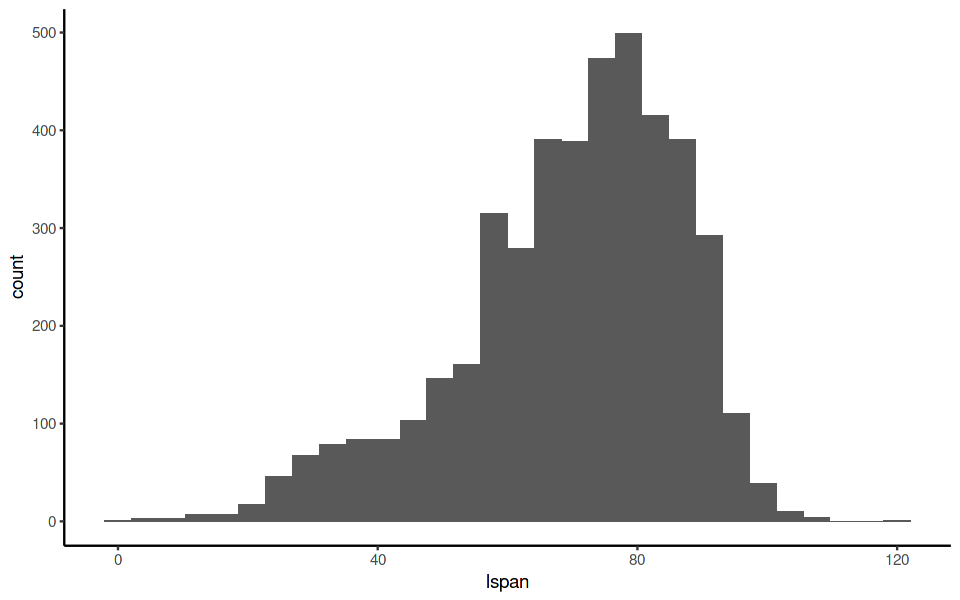

In [56]:
bhht %>% mutate(lspan = death - birth) %>% ggplot + geom_histogram(aes(x = lspan))

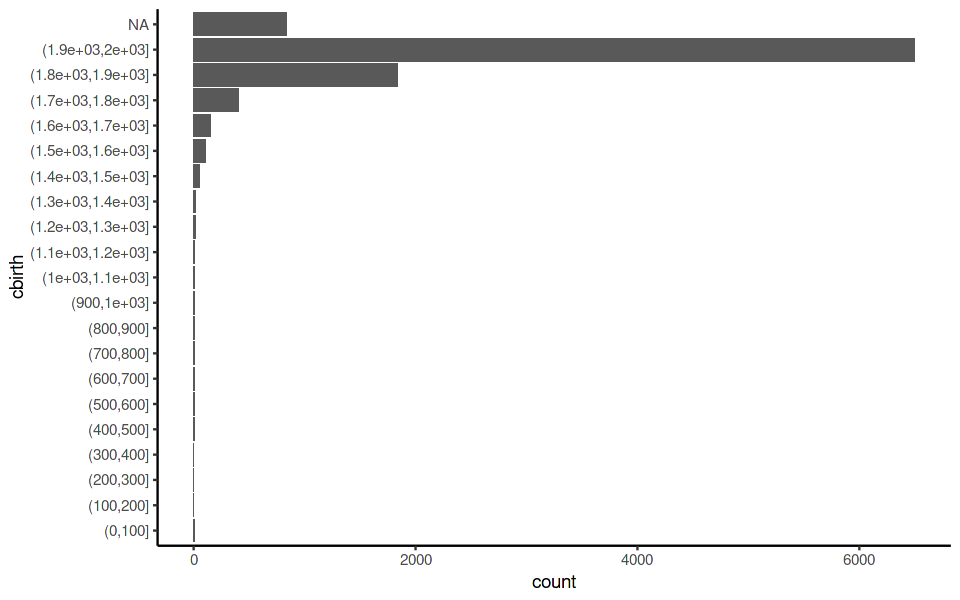

In [59]:
bhht %>% mutate(cbirth = cut(birth, seq(0, 2000, 100))) %>% 
    ggplot(aes(x = cbirth)) + geom_bar() + 
    coord_flip()

In [61]:
bhht %>% mutate(lspan = death - birth) %>% lm(lspan ~ birth, data = .) %>% summary  t


Call:
lm(formula = lspan ~ birth, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-69.597  -9.039   3.202  11.998  49.238 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.703819   2.547328   14.41   <2e-16 ***
birth        0.017925   0.001378   13.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.71 on 4413 degrees of freedom
  (5585 observations deleted due to missingness)
Multiple R-squared:  0.03691,	Adjusted R-squared:  0.03669 
F-statistic: 169.1 on 1 and 4413 DF,  p-value: < 2.2e-16


### Survival data

There are two basic features of survival data:

- **Time to Event**: The primary variable of interest, representing the time until the occurrence of a specific event.
- **Event Indicator**: A binary variable indicating whether the event of interest (e.g., failure, death) has occurred (1) or not (0).

This data is typically collected over a study period, with observations on individuals starting from a defined starting point until the occurrence of the event or the end of the study period.


### Censoring

A defining feature of survival data that makes its analysis different from other types of data is that it is usually *censored*:

- The event of interest may not have observed for some subjects during the study period for various reasons.
- Example: what is the lifespan of everyone born in 1940?
    - We only know it definitively for those who have already passed away.
    - For everyone else, we only know that their lifespan is _at least_ 84 years.
- Simply treating the observed lifespans like they are a random sample from the "lifespan distribution" is wrong if there is censoring.

### Censoring
Three types of censoring:    
- **Right Censoring**: The most common form, where the event has not occurred by the end of the study or the individual is lost to follow-up. We know only that the event time is greater than a certain value.
- **Left Censoring**: The event occurred before the individual entered the study, so the exact time is unknown but less than a certain value.
- **Interval Censoring**: The exact time of the event is unknown but falls within a certain interval

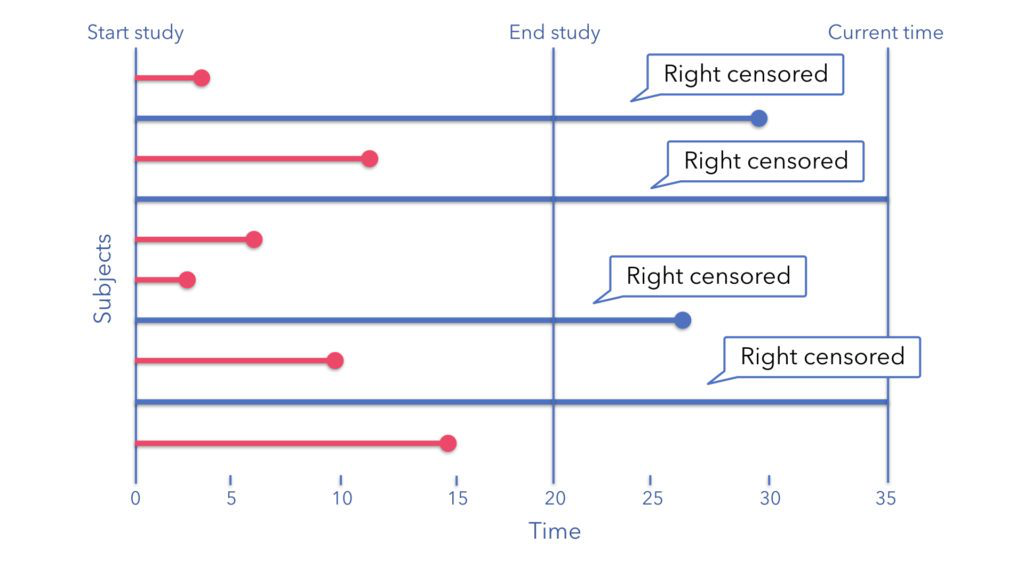

(Source: https://jigso.com/the-notion-of-censoring-in-survival-analysis/)

In [63]:
censor_plot <- function() {
    times = c(1.9,2.2,3.3,.5,1.5,3.5); marked = 1 + (rev(times) > 2.5); col = c("blue","red")[marked]
    barplot(times, width=.01, space=99, ylim=c(1,6), xlim=c(0,4), 
            horiz=TRUE, xlab="Years", ylab="Patient", xaxt = "n", yaxt="n")
    # points(c(1.9,2.2,3.3,.5,1.5,3.5), cex=0.75, pch=19)
    # Now call axis to draw tick marks and labels at 1:3
    axis(2, at = 1:6)
    axis(1, at = 0:4)
    abline(v=2.5)
    points(rev(times), c(6,5,4,3,2,1), 
           pch=c('o','x')[marked],
           col=col)
}

Censoring example:

- Everyone receives heart surgery at time 0 and is tracked for 2.5 years
- Blue 'o' denotes a heart attack observed while on study
- Red 'x' denotes a heart attack that occurs after study conclusion

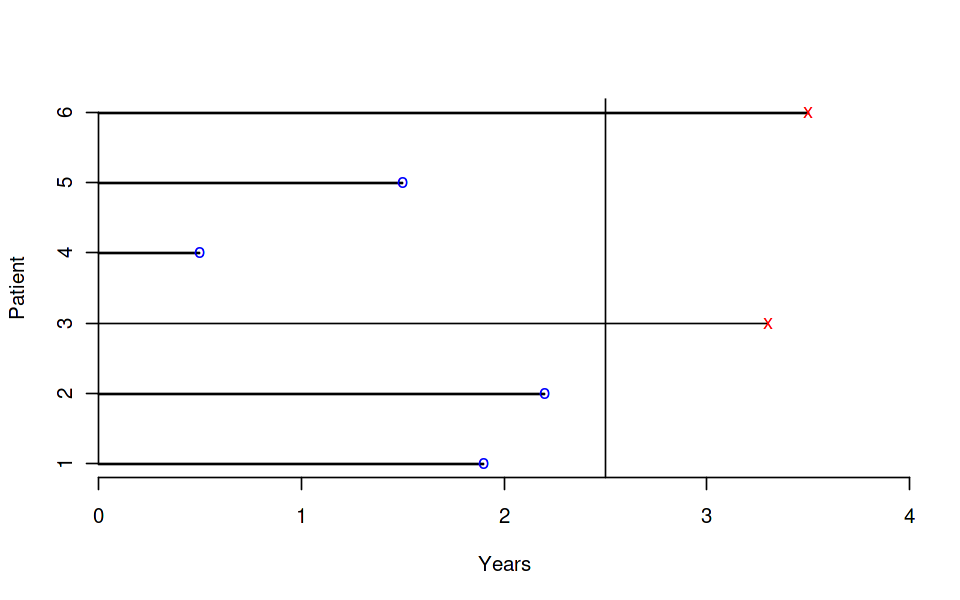

In [65]:
censor_plot()

# Terminology
- Random variable $T$ is the *survival time*
- CDF: $$F(t) = \mathbb{P}(T \le t)$$
- Survival function: $$S(t) = \mathbb{P}(T>t) = 1-F(t)$$
- PDF: $$f_T(t) = F'(t) = -S'(t)$$

### Hazard function
- The *hazard function* $h(t)$ is defined as $$h(t)=\lim_{\Delta t\to 0} \frac{\mathbb{P}(t \le T < t + \Delta t\mid T>t)}{\Delta t}$$
- Given that individual has survived to time $t$, the probability of death in the interval $[t, t + \Delta t)$ is  $\approx h(t)\Delta t$ (for small $\Delta t$)
- We are often interested in estimating this quantity.
- The cumulative hazard function $H(x)$ is defined as
$$H(x) = \int_0^x h(t)\,dt$$

### Relationships
- Note that $h(t)$ is a derivative: $$h(t) = \frac{f_T(t)}{S(t)} = -\frac{\mathrm{d}}{\mathrm{d}t}\log S(t)$$
- Hence, 
$$\begin{align*}S(t) &= \exp\left(-\int_0^t h(u)\,\mathrm{d}u\right) \\ 
 f(t) &= -S'(t) = h(t)\exp\left(-\int_0^t h(u)\,\mathrm{d}u\right) \\
H(x) &= -\int^x_0 \mathrm{d} \log S(u) = -\log S(x)
\end{align*}$$
- $\therefore$ distribution of $T$ is completely specified by $h$, $H$, $f$, or $S$

### Mean residual life
- This answers the question, *given that I have survived to time $x$, what is my expected future life span*
- Mathematically,

\begin{align*}
\operatorname{mrl}(x) &= \mathbb{E}(T-x\mid T>x) \\
&= \int_{x}^\infty (t-x)\,[f(t)/S(x)]\,dt \\
&= -\frac{\int_{x}^\infty (t-x) dS(t)}{S(x)} \\
&= \frac{\int_x^\infty S(t)\,dt}{S(x)}
\end{align*}

### Median survival time
This is simply the median of the survival distribution:

$$x_{1/2} = \inf \{t: S(t)\le 1/2\}$$

This generalizes to other quantiles by setting $0\le p \le 1$ in place of $1/2$ above.

### Example 
$h(t) = \lambda$ for some constant $\lambda>0$. What is the distribution of $T$? (i.e. what is $F(t)$)?

**Solution**. $F(t) = 1 - S(t) =1 -  e^{-\int_0^t \lambda \, \mathrm{d} u} = 1 - e^{-\lambda t}$, so $T \sim \operatorname{Exponential}(\lambda).$

### Exponential survival model
Exponential is the simplest survival model and has some nice properties:
- $\mathbb{P}(X>x+z\mid X>x)=\mathbb{P}(X>z)$  (memoryless)
  - Hence $\operatorname{mrl}(x)=1/\lambda$.
- Quantiles: $x_p=\log(1-p)/\lambda$.
  - Hence: $x_{1/2} = -\log(2)/\lambda$.
- $H(x) = -\log S(x) = \lambda x$. 
    - This can be used to check goodness of fit. 
    - Plot $\log \hat{S}(x)$ against $x$ and assess linearity.

### Example 2
The Weibull distribution with parameters $\alpha,\lambda > 0$ has pdf 

$$f_T(t) = \alpha\lambda(\lambda t)^{\alpha-1}\exp\left[-(t\lambda)^\alpha\right],\,t\ge 0.$$

**Challenge**: quickly guess the hazard function $h(t)$.

**Solution**. If $H(t) = \left(\lambda t\right)^{\alpha}$ then $$f_T(t) = H'(t) e^{-[H(t)-H(0)]} \mathrm{d}u.$$ Hence $$h(t) = H'(t)= \alpha\lambda(\lambda t)^{\alpha-1}.$$

- The Weibull distribution is common in survival analysis because it lets us control the shape of the hazard function while still being reasonably easy to work with. 
- Also, if $X\sim\operatorname{Weibull}(\alpha,\beta)$ then $$\log X = \mu + \sigma E$$ where $\mu=(\log \beta)/\alpha$, $\sigma=1/\alpha$ and $E\sim \operatorname{Gumbel}(0,1)$.
- Since $\log H(t) = \alpha (\log t - \log \beta)$, this can again be used to check for goodness of fit.

Weibull survival function:

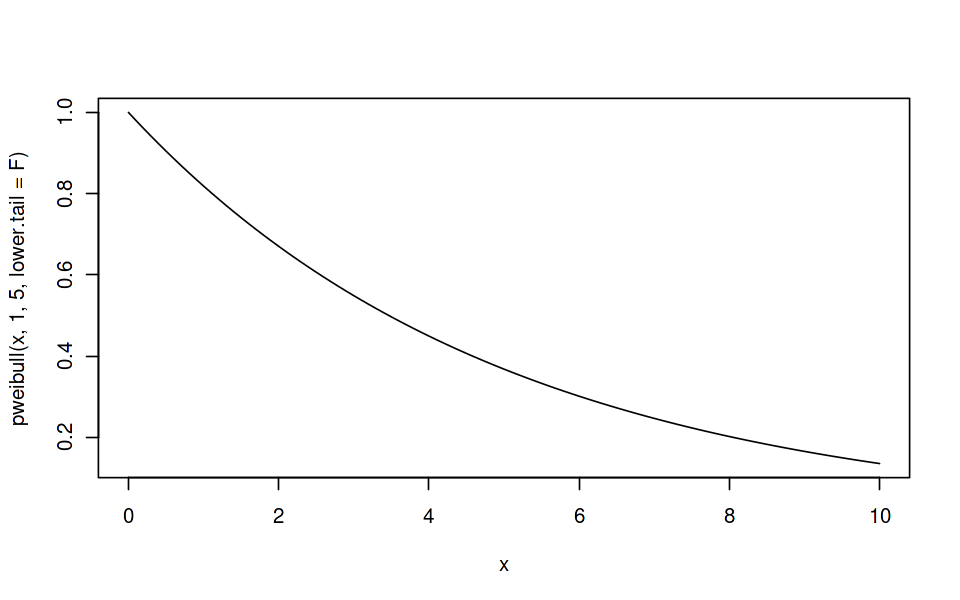

In [12]:

curve(pweibull(x, 1, 5, lower.tail = F), from=0, to=10)

Weibull hazard function:

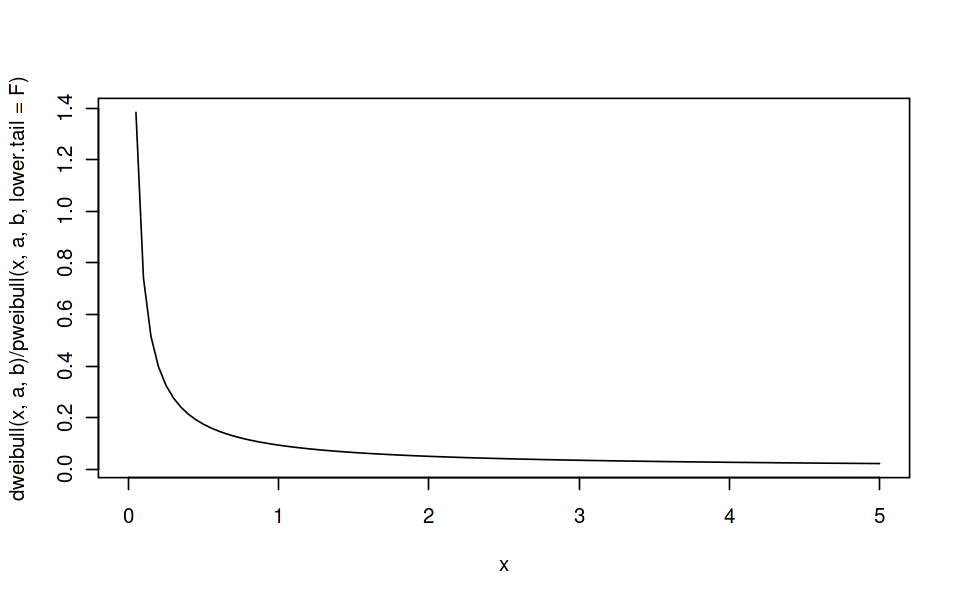

In [16]:
a=.1;b=2; 
curve(dweibull(x, a, b) / pweibull(x, a, b, lower.tail = F), from=0, to=5)

## Shapes of the hazard function
- Models with increasing hazard rates are more common. Why?
- Can you name a situation where decreasing hazard rate may occur?
- Hump-shaped may occur if there is an initial "danger period", e.g. infancy.
- The hazard function tends to be the most interpretable, so most people prefer it as a way to model survival.

# Survival analysis
- "Survival analysis" = estimating $S(t)$
- With no censoring, $$\hat{S}_{\text{MLE}}(t) = \{\text{proportion of sample who lived longer than $t$}\}$$

## The Kaplan-Meier estimator
The Kaplan-Meier (1958; >50k cites) *product-limit estimator* is $$\hat{S}(t) = \prod_{i:t_i \le t} \left( 1 - \frac{d_j}{n_j} \right)$$

- $t_1, \dots, t_k$: $k$ (distinct event times). 
- $d_i$: # of individuals who die at time $t_i$. 
- $n_i$: # of individuals who at *at risk* (alive and have not been censored) *prior* to time $t_i$



## Intuition
- If $t_{j} \le t < t_{j+1}$ then $$\begin{align*}\mathbb{P}(T>t) &= \mathbb{P}(T>t_j) \\ 
&= \mathbb{P}(T>t_{j} \mid T > T_{j-1}) \mathbb{P}(T > t_{j-1}) \\
&\vdots \\
&= \prod_{i=1}^j \mathbb{P}(T > t_i \mid T > t_{i-1})
\end{align*}$$
- MLE of $\mathbb{P}(T > t_j \mid T > t_{j-1})$ is the proportion of at-risk individuals who survive: $1 - d_j/n_j$

In R the `survival` library can fit a survival curve.

## Example
Let's go back to our BHHT dataset and look at people who were born in the last 100 years:

In [91]:
bhht %>% filter(birth >= 2024 - 100) %>% head

wikidata_code,birth,death,updated_death_date,approx_birth,approx_death,birth_min,birth_max,death_min,death_max,⋯,area2_of_rattachment,list_wikipedia_editions,un_region,group_wikipedia_editions,bplo1,dplo1,bpla1,dpla1,pantheon_1,level3_all_occ
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Q2072123,1927,2019,NA,NA,NA,1927,1927,2019,2019,⋯,Missing,jawiki|ruwiki|frwiki|enwiki|dewiki|itwiki,America,grA,-87.493103,-74,41.61110,40.7,0,D:_violin_P:_violin_English_violoniste_French_violinista_insegnante_Italian_geige_musik_pädagoge_German
Q2562298,1949,NA,NA,NA,NA,1949,1949,NA,NA,⋯,Missing,dewiki,Europe,grB,NA,NA,NA,NA,0,D:_football_P:_fußball_mittelfeldspieler_German
Q2953289,1969,NA,NA,NA,NA,1969,1969,NA,NA,⋯,Missing,nlwiki|frwiki|enwiki|fawiki,Europe,grA,9.883333,NA,45.51972,NA,0,D:_sport_P:_racing_cyclist_racing_English_ coureur_coureur_cycliste_French
Q7816788,1959,NA,NA,NA,NA,1959,1959,NA,NA,⋯,Missing,enwiki,America,grA,-75.163612,NA,39.95278,NA,0,D:_football_P:_soccer_English
Q2836316,1976,NA,NA,NA,NA,1976,1976,NA,NA,⋯,Missing,frwiki|enwiki|arwiki|fawiki,Asia,grA,35.513054,NA,33.88694,NA,0,D:_football_P:_football_English_football_club_French
Q55761952,1943,2018,NA,NA,NA,1943,1943,2018,2018,⋯,Missing,dewiki,Europe,grB,-112.087502,NA,38.76583,NA,0,D:_literary_P:_baden_professor_musik_German


First, we will assume that everyone who has a missing `death` value is still alive.

In [138]:
bhht %>% filter(birth >= 2024 - 100) %>% select(birth, death) %>% 
    arrange(birth) %>% head

birth,death
<dbl>,<dbl>
1924,2008
1924,2016
1924,1995
1924,2002
1924,1979
1924,NA


In [139]:
bhht_surv <- bhht %>% filter(birth >= 2024 - 100) %>% 
    select(birth, death_estimation) %>% 
    mutate(
        dead = death_estimation < 2024,
        time = ifelse(dead, death_estimation - birth, 2024 - birth)
    )

In [140]:
library(survival)

sfit = survfit(Surv(time, dead) ~ 1, data = bhht_surv)
summary(sfit)

Call: survfit(formula = Surv(time, dead) ~ 1, data = bhht_surv)

 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
  5.0   5525       1  0.99982 0.000181      0.99946      1.00000
 10.0   5524       1  0.99964 0.000256      0.99914      1.00000
 13.0   5522       1  0.99946 0.000313      0.99884      1.00000
 15.0   5521       1  0.99928 0.000362      0.99857      0.99999
 17.0   5519       1  0.99909 0.000405      0.99830      0.99989
 19.0   5516       1  0.99891 0.000443      0.99805      0.99978
 20.0   5515       2  0.99855 0.000512      0.99755      0.99956
 21.0   5510       1  0.99837 0.000543      0.99731      0.99943
 22.0   5509       3  0.99783 0.000627      0.99660      0.99906
 23.0   5504       2  0.99746 0.000677      0.99614      0.99879
 24.0   5497       2  0.99710 0.000724      0.99568      0.99852
 25.0   5479       2  0.99674 0.000768      0.99523      0.99824
 26.0   5458       8  0.99528 0.000924      0.99347      0.99709
 27.0   5429       4  0.9

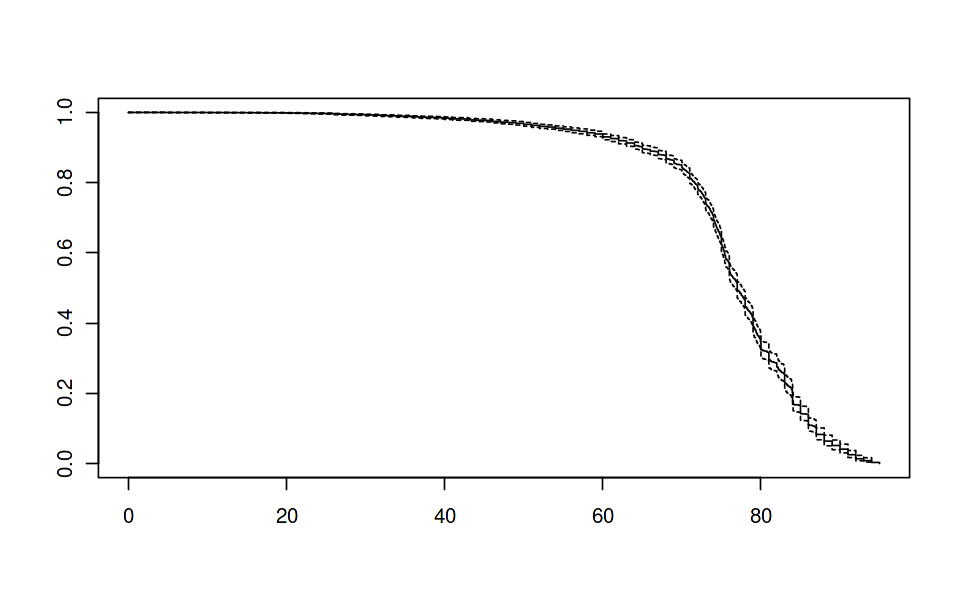

In [137]:
plot(sfit)

## How it works: The Kaplan-Meier estimator


We will focus on right-censored data to begin.

- $t_1, \dots, t_k$: $k$ (distinct event times). 
- $d_i$: # of individuals who die at time $t_i$. 
- $n_i$: # of individuals who at *at risk* (alive and have not been censored) *prior* to time $t_i$

*Important*: we assume that the censoring times and lifetimes are independent.



The Kaplan-Meier (1958; >50k cites) *product-limit estimator* is $$\hat{S}(t) = \prod_{j:t_j \le t} \left( 1 - \frac{d_j}{n_j} \right)$$

### Intuition
- If $t_{j} \le t < t_{j+1}$ then $$\begin{align*}\mathbb{P}(T>t) &= \mathbb{P}(T>t_j) \\ 
&= \mathbb{P}(T>t_{j} \mid T > T_{j-1}) \mathbb{P}(T > t_{j-1}) \\
&\vdots \\
&= \prod_{i=1}^j \mathbb{P}(T > t_i \mid T > t_{i-1})
\end{align*}$$
- MLE of $\mathbb{P}(T > t_j \mid T > t_{j-1})$ is the proportion of at-risk individuals who survive: $1 - d_j/n_j$

### Using covariates

- If we specify covariates, `survfit` will generate one survival curve per unique combination of the covariates.


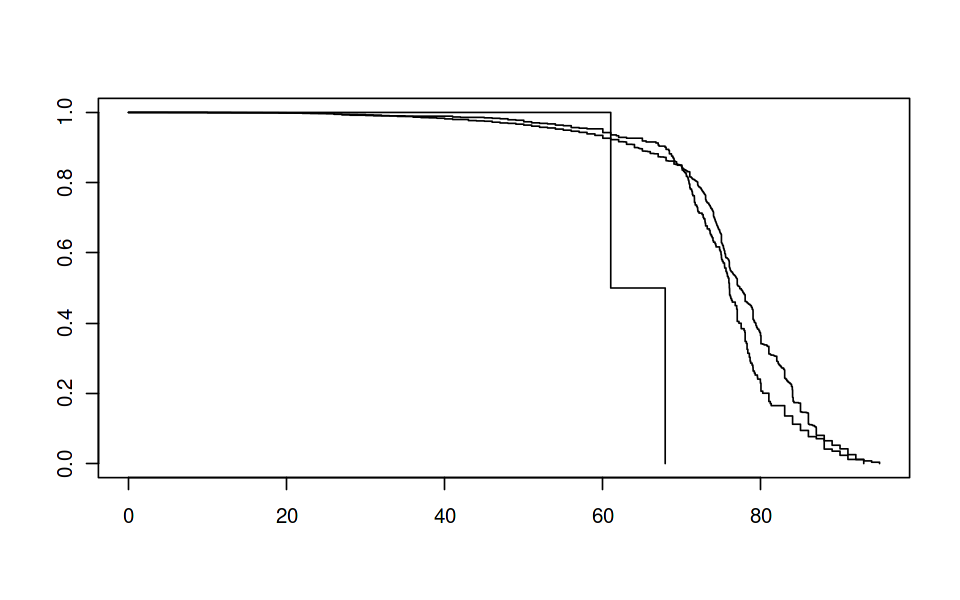

In [161]:
bhht_surv <- bhht %>% filter(birth >= 2024 - 100) %>% 
    select(birth, death_estimation, gender, un_region) %>% 
    mutate(
        dead = death_estimation < 2024,
        time = ifelse(dead, death_estimation - birth, 2024 - birth)
    ) %>% 
    drop_na


sfit = survfit(Surv(time, dead) ~ gender, data = bhht_surv)
plot(sfit)

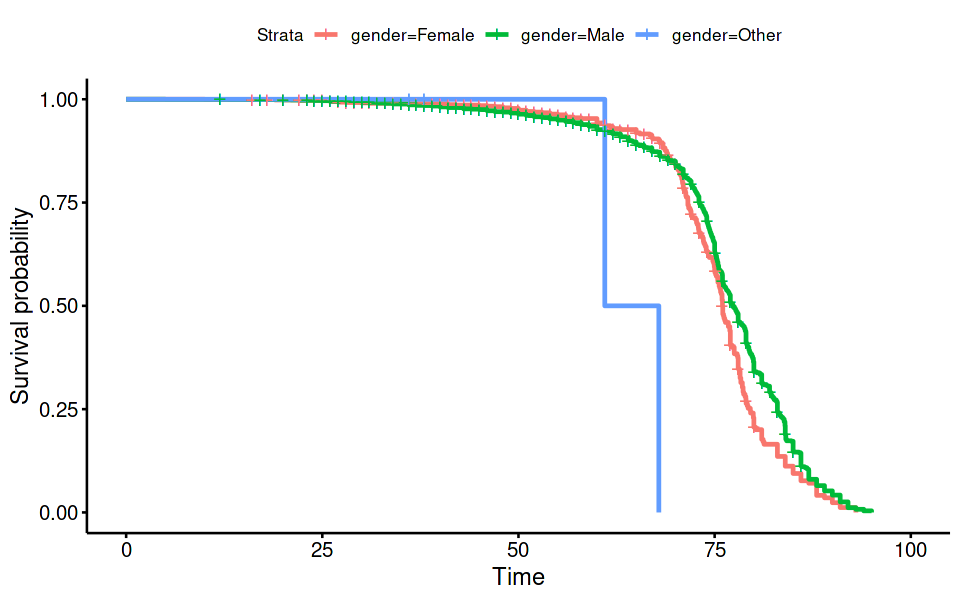

In [162]:
library(survminer)
ggsurvplot(sfit)

### Proportional hazards regression
- The K-M estimator is _non-parametric_; it estimates a whole function without assuming any model.
- If we want to be able to interpret the effect of different covariates on survival, we need a model which relates
the covariates to the outcome (lifespan).
    - We are going to model the hazard rate function directly. 
    - The approach we will use is similar to how we used generalized linear modeling to allow differences in the mean parameter for various distributions.

### The Cox model
- Let $\mathbf{Z}$ be a vector of individual-specific covariates.
- The proportional hazards model assumes that $$h(t\mid \mathbf{Z}) = h_0(t)c(\beta^\intercal \mathbf{Z}),$$ where $h_0$ is an unknown baseline hazard rate and $\mathbf{Z}\in\mathbb{R}^p$ is a vector of predictors.
- $c(\cdot)$ is analagous to the link function in GLM. 
- The natural choice is $c=\exp$, leading to the famous Cox model.

### Interpretation
- Let $S_0(t)=\exp(-\int_0^t h_0(s)\,ds)$ be the baseline survival function.
- Then $$S(t\mid \mathbf{Z}) = \exp\left(-\int_0^t h(s\mid \mathbf{Z})\,ds\right) = S_0(t)^{e^{\mathbf{Z}^\intercal \beta}}$$
- Additionally, $\log h(t\mid\mathbf{Z}) = \log h_0(t) + \mathbf{Z}^\intercal \beta$, so $\log h_0(t)$ is a sort of intercept term.
- This is known as a **semi-parametric** model: there is a parametric (finite dimensional) component $\beta$ as well as an infinite dimensional parameter $h_0(t)$.

## Proportional hazards property
As already remarked, the Cox model has the proportional hazards property:
   - Let $\mathbf{Z},\mathbf{Z}^*$ be covariates for two different patients.
   - Then $$\frac{h(t\mid\mathbf{Z})}{h(t\mid\mathbf{Z}^*)} = \exp[\beta(\mathbf{Z}-\mathbf{Z}^*)],$$ i.e. it is constant over time.
   - In particular, if there is a single treatment effect $\beta$, the hazard ratio is $e^\beta$, similar to logistic regression.

## Estimating the proportional hazards model
- Estimation is complicated by the fact that part of the model $h_0(t)$ is infinite dimensional.
- Cox's brilliant insight was that it is possible to estimate $\beta$ in spite of this!
- To overcome this we use a technique called *partial likelihoods*.
    - Say we observe deaths at times $t_1,\dots,t_D$.
    - The person who died at time $t_i$ is denoted "person $i$" and has covariates $\mathbf{Z}_i$.  (As usual, we assume no ties.)
    - Assuming no ties and independence between the life spans, we have
$$\mathbb{P}(\text{data}) = \prod_{i=1}^D \underbrace{\mathbb{P}(\text{person $i$ died}\mid\text{somebody died at $t_i$})}_\text{(I)} \underbrace{\mathbb{P}(\text{somebody died at $t_i$})}_\text{(II)}$$
    - Term (I) is simply the softmax function which we studied in multinomial logit: $$\frac{\exp(\mathbf{Z}_i^\intercal \beta)}{\sum_{j\in R(t_i)} \exp(\mathbf{Z}_j^\intercal \beta)}.$$ Here, the summation is over the set $R(t_i)$ of people who are at risk at time $t_i$.


## The partial likelihood
- The partial likelihood is formed by considering the product of term (I) only. That is, we condition on the observed death times $t_1,\dots,t_D$ and do not use them for inference: $$L(\beta) = \prod_i \frac{\exp(\mathbf{Z}_i^\intercal \beta)}{\sum_{j\in R(t_i)} \exp(\mathbf{Z}_j^\intercal \beta)}.$$

## The MPLE
- To fit the partial likelihood we maximize $\text{LL}(\beta)=\log L(\beta)$ with respect to $\beta$, obtaining the *maximum partial likelihood estimator* (MPLE).
- This can be accomplished by setting the score functions $$U_h = \frac{\partial \log L(\beta)}{\beta_h}=\sum_{i=1}^D Z_{ih} - \frac{\sum_{j\in R(t_i)} Z_{jh} \exp(\mathbf{Z}_j^\intercal \beta)}{\sum_{j\in R(t_i)} \exp(\mathbf{Z}_j^\intercal \beta)}$$ to zero.

## Fitting the proportional hazards model
The command ``coxph`` is used to fit the Cox model in R.

In [170]:
cfit = coxph(Surv(time, dead) ~ gender, data = bhht_surv)
summary(cfit)

Call:
coxph(formula = Surv(time, dead) ~ gender, data = bhht_surv)

  n= 5459, number of events= 1551 

                coef exp(coef) se(coef)      z Pr(>|z|)   
genderMale  -0.17126   0.84260  0.06965 -2.459  0.01394 * 
genderOther  2.01080   7.46927  0.71110  2.828  0.00469 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            exp(coef) exp(-coef) lower .95 upper .95
genderMale     0.8426     1.1868    0.7351    0.9658
genderOther    7.4693     0.1339    1.8535   30.1001

Concordance= 0.501  (se = 0.006 )
Likelihood ratio test= 10.87  on 2 df,   p=0.004
Wald test            = 15.2  on 2 df,   p=5e-04
Score (logrank) test = 19.35  on 2 df,   p=6e-05
